# Inferência Bayesiana

## Outro exemplo de priori conjugada

***Estatística para Ciência de Dados***

por **Caio Moura** (14/09/2021 - São Carlos SP)

**MBA em Ciências de Dados**


### Contextualizando:

Quando falamos em inferência estatística, talvez seja interessante relembrar o que é inferência. Falando informalmente, fazemos inferências várias vezes ao dia. Se onde você está não está chovendo, mas se veem nuvens escuras e se ouvem trovões, é razoável inferir que vai chover em breve. Se seu amigo sempre se atrasa em torno de 15 minutos para eventos, você, com base no comportamento passado dele, pode inferir que ele vai se atrasar em torno de 15 minutos no próximo evento. Você pode errar, mas os dados anteriores te levam a acreditar nisso. Nesses exemplos, você está fazendo o papel de estimador que chega a conclusões com base em informações disponíveis.

Citando Mood, Graybill e Boes (1963, p.271),
"O problema de estimação, aqui considerado, é vagamente definido da seguinte forma: suponha que uma característica da população possa ser representada por uma variável aleatória $X$ cuja densidade é $f_X (\cdot;\theta) = f(\cdot;\theta)$ supondo que a forma da densidade seja conhecida exceto por conter um parâmetro desconhecido $\theta$ (se $\theta$ fosse conhecido, a função densidade estaria completamente especificada e não haveria necessidade de fazer inferências a respeito). Além disso, suponha que os valores $x_1, x_2, \ldots, x_n$ de uma amostra aleatória $X_1, X_2, \ldots, X_n$ cada uma com densidade $f(\cdot;\theta)$ possam ser observados. Com base nos valores amostrais observados $x_1, x_2, \ldots, x_n$ é desejável estimar o valor do parâmetro desconhecido $\theta$ ou o valor de alguma função, digamos $\tau (\theta)$, de um parâmetro desconhecido. Essa estimação pode ser feita de duas formas. A primeira, chamada _estimação pontual_,  permite que o valor de alguma estatística, digamos $t(X_1, X_2, \ldots, X_n)$, representar ou estimar o $\tau (\theta)$ desconhecido; tal estatística $t(X_1, X_2, \ldots, X_n)$ é chamada _estimador pontual_. O segundo, chamado _estimador intervalar_, é definido por duas estatísticas, digamos $t_1(X_1, X_2, \ldots, X_n)$ e $t_2(X_1, X_2, \ldots, X_n)$, sendo $t_1(X_1, X_2, \ldots, X_n) < t_2(X_1, X_2, \ldots, X_n)$ e assim $(t_1(X_1, X_2, \ldots, X_n) , t_2(X_1, X_2, \ldots, X_n))$ constitui um intervalo cuja probabilidade de conter o $\tau (\theta)$ desconhecido pode ser determinada."

Num curso de inferência há todo um estudo sobre quais são as características de um estimador e como verificá-las. Num curso de inferência clássica, supomos que o parâmetro $\theta$ é desconhecido. Na inferência bayesiana supomos que $\theta$ é uma variável aleatória. Essa é uma diferença filosófica grande entre as duas inferências. Na bayesiana podemos construir um intervalo de credibilidade com probabilidade de 95% do parâmetro $\theta$ estar contido neste. Por sua vez, na clássica, podemos construir um intervalo de confiança com 95% de probabilidade de conter o parâmetro $\theta$ desconhecido.

Com o auxílio do teorema de Bayes, podemos obter a densidade a posteriori com o auxílio da verossimilhança e da distribuição a priori:
$$ p(\theta | x_1, \ldots, x_n) \propto L(\theta | x_1, \ldots, x_n).p(\theta)$$

In [1]:
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

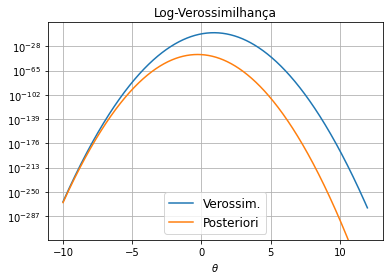

In [2]:
np.random.seed(1)
dados = np.random.normal(loc=1,scale=1, size=10)
theta = np.linspace(-10, 12, 1000)

L = []
P = []
for i in theta:
    L.append(norm.pdf(dados,i,1.0).prod())
    P.append(norm.pdf(dados,i,1.0).prod()*norm.pdf(i,-12.0,1.0))

plt.plot(theta, L, label = "Verossim.")
plt.plot(theta, P, label = "Posteriori")
plt.title(r'Log-Verossimilhança')
plt.xlabel(r'$\theta$')
plt.yscale('log')
plt.legend(loc='lower center', shadow=False, fontsize='large')
plt.grid()

#plt.savefig("likelihood_normal_distribution_02.png", bbox_inches='tight')
plt.show()


Observe que no exemplo acima, geramos uma amostra de tamanho $n = 10$ para uma variável aleatória normal $X \sim N(\theta = 1, \sigma = 1)$. Neste problema, supomos o $\theta$ desconhecido. Queremos estimá-lo. Usamos uma distribuição a priori $\theta \sim N(\theta_0 = -12, \sigma_0 = 1 )$. Veja que essa distribuição a priori consegue mover a verossimilhança (a curva em azul) para a esquerda para compor a distribuição a posteriori (a curva laranja). Mesmo que os dados tenham uma distribuição amostral com média igual a 1 (num problema real não saberíamos o valor verdadeiro), a distribuição a priori pode ter sua influência.

O gráfico está em escala logarítmica para permitir melhor visualização. Neste caso, foi escolhida uma priori conjugada, ou seja, a distribuição da posteriori é a mesma que a distribuição da priori. Seria possível determinar analiticamente a distribuição a posteriori.

$${\displaystyle {\begin{aligned}p(\theta | x_1, \ldots, x_n)&{}\propto L(\theta | x_1, \ldots, x_n).p(\theta)\\&{}=\prod_{i=1}^n \left({\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {(x_i-\theta )^{2}}{2\sigma ^{2}}}}\right).{\frac {1}{\sigma_0 {\sqrt {2\pi }}}}e^{-{\frac {(\theta-\theta_0 )^{2}}{2\sigma_0 ^{2}}}}\\&{}\propto e^{-{\frac {(\theta- \theta_1 )^{2}}{2\sigma_1 ^{2}}}} \sim N(\theta_1, \sigma_1^2),\\\end{aligned}}}  $$

com $\theta_1 = {\displaystyle {\frac {1}{{\frac {1}{\sigma _{0}^{2}}}+{\frac {n}{\sigma ^{2}}}}}\left({\frac {\theta _{0}}{\sigma _{0}^{2}}}+{\frac {\sum _{i=1}^{n}x_{i}}{\sigma ^{2}}}\right)}$ e $\sigma_1^2 = {\displaystyle \left({\frac {1}{\sigma _{0}^{2}}}+{\frac {n}{\sigma ^{2}}}\right)^{-1}}.$

Todavia, também podemos usar um método numérico de amostragem de distribuição de probabilidade como o MCMC. Neste caso, não precisamos saber qual é a distribuição da posteriori. O método sorteia observações desta e, assim, construímos um histograma, calculamos média, desvio padrão. Com os percentis, construímos intervalos de confiança. Já para estimadores pontuais, precisamos lembra que eles derivam de uma escolha de função de perda e do cálculo do estimador de Bayes para a mesma. Logo, por mais que seja intuitivo usar a média, a mediana das amostras obtidas pelo MCMC como estimadores pontuais, é preciso lembrar que esse uso é justificado teoricamente.

In [3]:
import pymc3 as pm
import arviz as az

In [4]:
with pm.Model() as model:
    # Distribuições a priori
    theta_1 = pm.Normal('theta', mu = -12, sigma = 1)
    
    # Verossimilhança
    obs_1 = pm.Normal('obs_1', mu = theta_1, sigma = 1, observed = dados)
    
    # Algoritmo usado
    step = pm.Metropolis()

    # Sorteios de observações da distribuição a posteriori
    trace_original = pm.sample(draws= 25000, tune = 2000, chains= 2, step = step, cores = 2)


/tmp/ipykernel_873524/3988469169.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_original = pm.sample(draws= 25000, tune = 2000, chains= 2, step = step, cores = 2)
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [theta]


Sampling 2 chains for 2_000 tune and 25_000 draw iterations (4_000 + 50_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.


/home/moura/myprojectdir/myprojectenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>]], dtype=object)

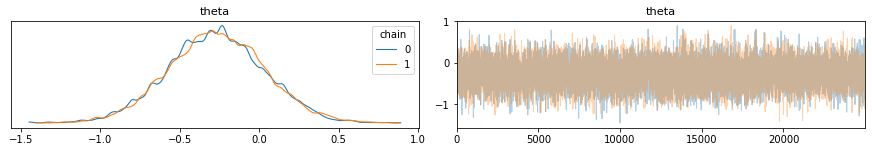

In [5]:
# Gráfico para avaliar a convergência do método
az.plot_trace(trace_original, ['theta'], compact=False, legend=True)

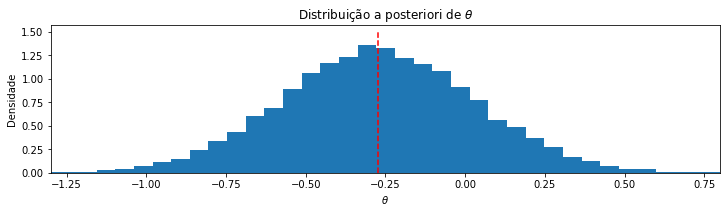

In [6]:
plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.hist(trace_original['theta'], bins=40, density=True);
plt.xlim([-1.3, 0.8])
plt.vlines(trace_original['theta'].mean(), 0, 1.5, linestyles='dashed', color = "red")
plt.title(r'Distribuição a posteriori de $\theta$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'Densidade')
plt.show()

/home/moura/myprojectdir/myprojectenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'theta\n0'}>,
       <AxesSubplot:title={'center':'theta\n1'}>], dtype=object)

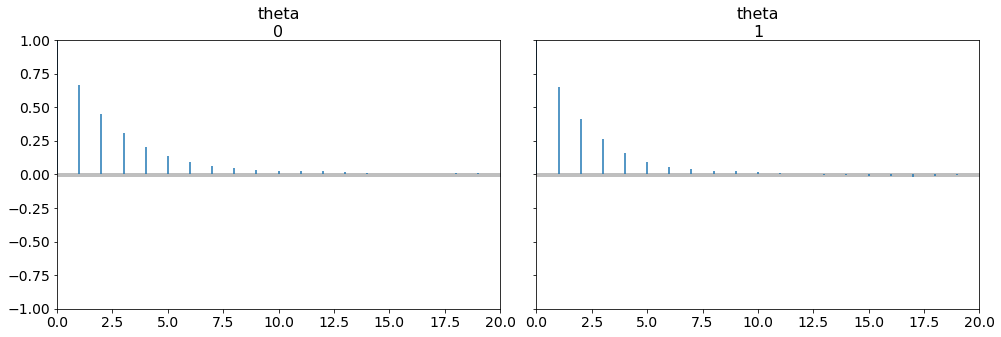

In [7]:
# Gráfico para avaliar a correlação das observações.
# É desejável que as observações sorteadas não tenham correlação expressiva.
az.plot_autocorr(trace_original, ['theta'], max_lag=20 )

Observe que as correlações têm uma distância de aproximadamente 10 observações até que a autocorrelação deixe de ser significativa. A autocorrelação é algo indesejável, pois queremos amostras independentes. Para diminuí-la, podemos escolher as observações das coordenadas 0, 10, 20 e etc. Assim, a amostra resultante tem menor autocorrelação.

In [8]:
import pandas as pd

trace = trace_original.get_values('theta', burn=0, chains=[0, 1], combine = False, thin = 10)
# Transpondo as duas linha que correspondem às observações de cada linha
trace_1 = np.array(trace).T.tolist()

df_describe = pd.DataFrame(trace_1)
df_describe.describe(percentiles = [0.025, 0.50, 0.975])


,0,1
count,2500.000000,2500.000000
mean,-0.276575,-0.269305
std,0.303862,0.304659
min,-1.448368,-1.298633
2.5%,-0.866249,-0.871541
50%,-0.280958,-0.274108
97.5%,0.316665,0.355696
max,0.802551,0.745632


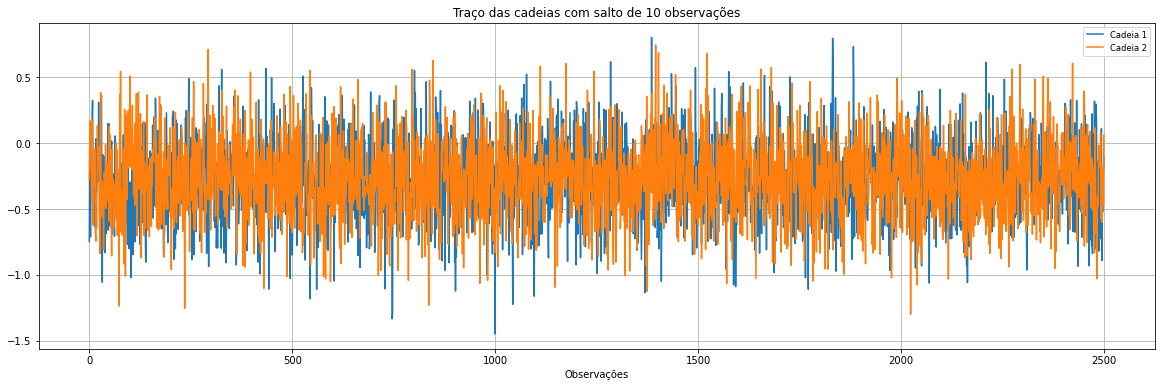

In [9]:
plt.figure(figsize = (20, 6))
plt.plot(df_describe, label = ['Cadeia 1', 'Cadeia 2'])
plt.title(r'Traço das cadeias com salto de 10 observações')
plt.xlabel(r'Observações')
plt.legend(loc='upper right', shadow=False, fontsize='small')
plt.grid()
plt.show()

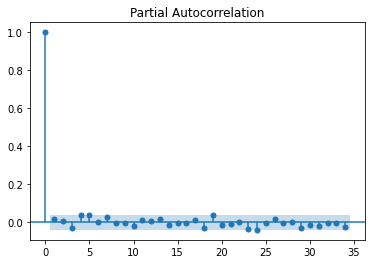

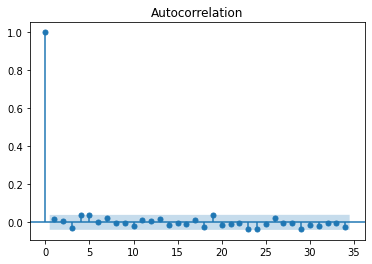

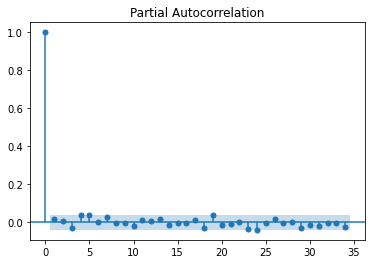

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Cadeia 1
plot_acf(df_describe.iloc[:, 0])
plot_pacf(df_describe.iloc[:, 0])

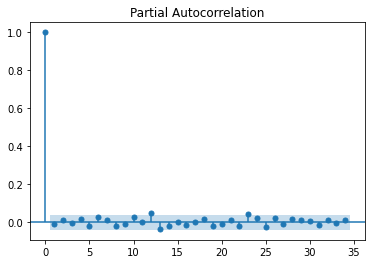

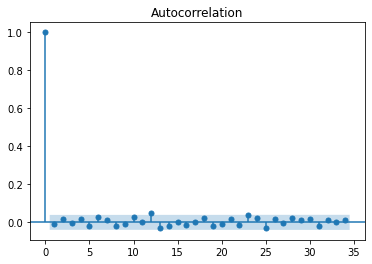

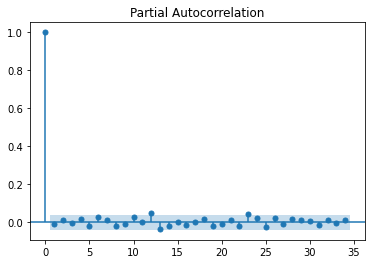

In [11]:
# Cadeia 2
plot_acf(df_describe.iloc[:, 1])
plot_pacf(df_describe.iloc[:, 1])


Veja que a autocorrelação diminuiu em relação à amostra original.

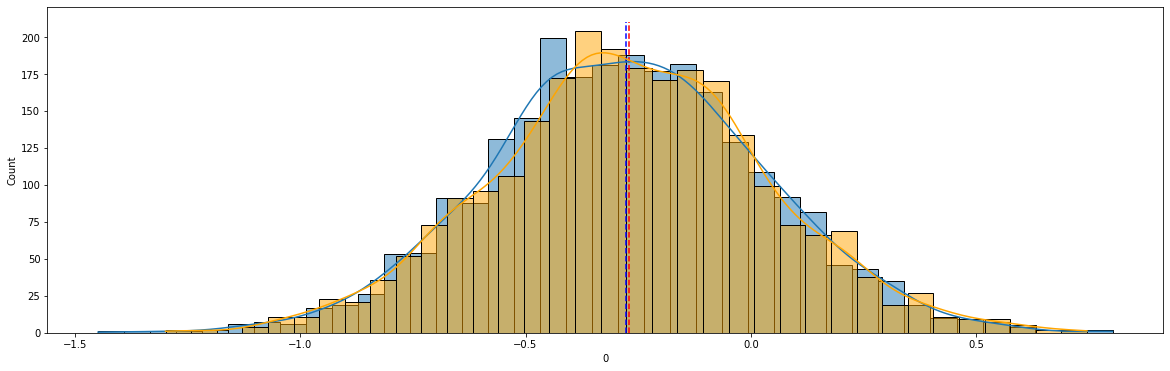

In [12]:
#Para mostrar lado a lado
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
#sns.histplot(df_describe.iloc[:,0], kde=True, ax=ax[0])
#sns.histplot(df_describe.iloc[:,1], kde=True, ax=ax[1], color='orange')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,6))
sns.histplot(df_describe.iloc[:,0], kde=True)
sns.histplot(df_describe.iloc[:,1], kde=True, color='orange')
plt.vlines(df_describe.iloc[:,0].mean(), 0, 210, linestyles='dashed', color = "blue")
plt.vlines(df_describe.iloc[:,1].mean(), 0, 210, linestyles='dashed', color = "red")

Agora que diminuímos nas duas cadeias a autocorrelação, podemos juntar os valores das duas cadeiras e calcular as estatísticas de interesse:   

In [13]:
trace = trace_original.get_values('theta', burn=0, chains=[0, 1], combine = True, thin = 10)
trace_1 = np.array(trace).T.tolist()
df_describe = pd.DataFrame(trace_1)
df_describe.describe(percentiles = [0.025, 0.50, 0.975])

,0
count,5000.000000
mean,-0.272940
std,0.304252
min,-1.448368
2.5%,-0.870793
50%,-0.277584
97.5%,0.328057
max,0.802551


## Problema e heurística

### Um problema artificial para motivar um modelo 

Suponha que em um concurso de sobremesas o único jurado tenha que avaliar os pratos de $N=10$ competidores. É dada uma nota 0 ou 1 em cada um dos 5 quesitos que o jurado tem para avaliar cada prato. Não há nota 0,5. Portanto, há 6 notas possíveis

Suponha também que a decisão de atribuir uma nota 1 no primeiro quesito é dada por uma variável aleatória $X_1 \sim Bernoulli(p).$ O Mesmo ocorre para os outros quesitos ($X_i \sim Bernoulli(p)$ com $i=1,\ldots, 5$). Ao somarmos as notas dos 5 quesitos, temos $Y = \sum_{i=1}^5 X_i \sim Binomial(n= 5, p)$. Entretanto, não conhecemos o valor da probabilidade $p$. Podemos usar o que sabemos de inferencia bayesiana para modelar o problema.

Para tal, necessitamos decidir uma distribuição de probabilidade a priori. Vamos supor que o jurado seja rigoroso e tende a dar notas mais baixas. Com uma média de notas igual a 1, numa escala de 0 a 5. Logo, escolhemos uma distribuição a priori que assume apenas valores entre 0 e 1 e tem média igual a 0,2, pois para $p=0,2$, a esperança de $Y$ é $E[Y] = n*p = 5*0,2 = 1$.

A distribuição escolhida é $p \sim Beta(\alpha = 20, \beta = 80)$. Trata-se de uma priori conjugada, pois

$${\displaystyle {\begin{aligned}p(p | x_1, \ldots, x_N)&{}\propto L(p | x_1, \ldots, x_N).p(p)\\&{}=\prod_{i=1}^n \left({{\binom {5}{x_i}}p^{x_i}(1-p)^{5-x_i}}\right).{\frac {1}{\mathrm {B} (\alpha ,\beta )}}p^{\alpha -1}(1-p)^{\beta -1}\\&{}\propto p^{\alpha_1 -1}(1-p)^{\beta_1 -1} \sim Beta(\alpha_1, \beta_1),\\\end{aligned}}}  $$

com $\alpha_1 = \alpha +\sum _{i=1}^{n}x_{i}$ e $\beta_1 = \,\beta +\sum _{i=1}^{n}(N-x_{i})\!$

Nesse caso, conseguimos até mesmo calcular analiticamente a média da distribuição a posteriori:
    $$E[p|x_1,\ldots, x_N] = \frac{\alpha_1}{\alpha_1+ \beta_1} = \frac{20}{20+ 80} = 0,20.$$

Há uma certa arbitrariedade nos valores dos hiperparâmetros escolhidos (20 e 80). Intuitivamente, o primeiro parâmetro ($\alpha$) favorece (atrai) valores de $p$ mais próximos de 1 e o segundo ($\beta$), mais próximos de 0.

In [14]:
notas = [2,4,5,4,0,0,4,1,2,4]

with pm.Model() as model:
    # Distribuições a priori
    p = pm.Beta('p',alpha = 20, beta = 80)
    
    # Verossimilhança
    obs = pm.Binomial('notas', n = 5, p = p , observed = notas)
    
    # Algoritmo usado
    step = pm.Metropolis()

    # Sorteios de observações da distribuição a posteriori
    trace_original = pm.sample(draws= 25000, tune = 2000, chains= 2, step = step, cores = 2)


/tmp/ipykernel_873524/620128333.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_original = pm.sample(draws= 25000, tune = 2000, chains= 2, step = step, cores = 2)
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p]


Sampling 2 chains for 2_000 tune and 25_000 draw iterations (4_000 + 50_000 draws total) took 9 seconds.
The number of effective samples is smaller than 25% for some parameters.


/home/moura/myprojectdir/myprojectenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

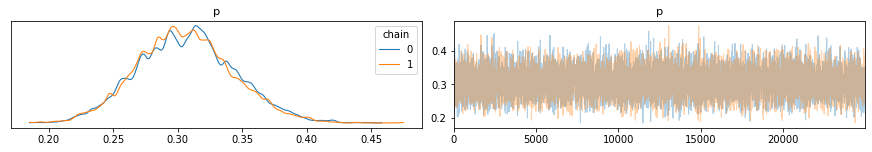

In [15]:
# Gráfico para avaliar a convergência do método
az.plot_trace(trace_original, ['p'], compact=False, legend=True)

In [14]:
notas = [2,4,5,4,0,0,4,1,2,4]

with pm.Model() as model:
    # Distribuições a priori
    p = pm.Beta('p',alpha = 20, beta = 80)
    
    # Verossimilhança
    obs = pm.Binomial('notas', n = 5, p = p , observed = notas)
    
    # Algoritmo usado
    step = pm.Metropolis()

    # Sorteios de observações da distribuição a posteriori
    trace_original = pm.sample(draws= 25000, tune = 2000, chains= 2, step = step, cores = 2)


/tmp/ipykernel_584327/620128333.py:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_original = pm.sample(draws= 25000, tune = 2000, chains= 2, step = step, cores = 2)
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p]


Sampling 2 chains for 2_000 tune and 25_000 draw iterations (4_000 + 50_000 draws total) took 9 seconds.
The number of effective samples is smaller than 25% for some parameters.


/home/moura/myprojectdir/myprojectenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

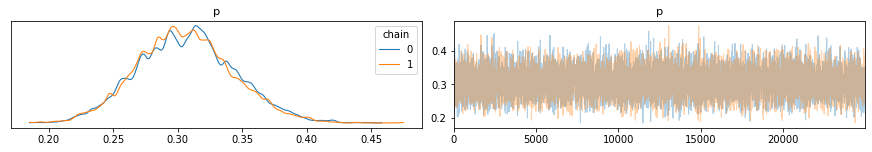

In [15]:
# Gráfico para avaliar a convergência do método
az.plot_trace(trace_original, ['p'], compact=False, legend=True)

/home/moura/myprojectdir/myprojectenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'p'}>

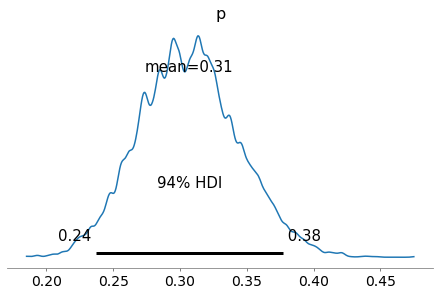

In [16]:
az.plot_posterior(trace_original)

/home/moura/myprojectdir/myprojectenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'95.0% HDI'}>,
       <AxesSubplot:title={'center':'r_hat'}>], dtype=object)

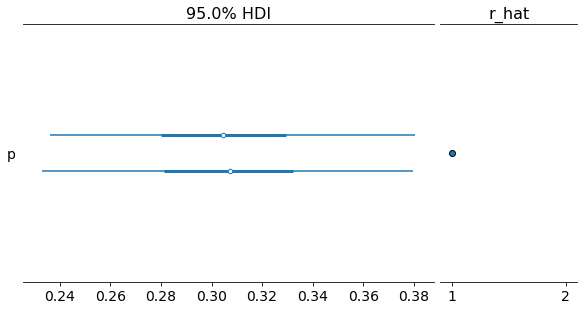

In [17]:
az.plot_forest(trace_original, r_hat=True, hdi_prob=0.95)

/home/moura/myprojectdir/myprojectenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'p\n0'}>,
       <AxesSubplot:title={'center':'p\n1'}>], dtype=object)

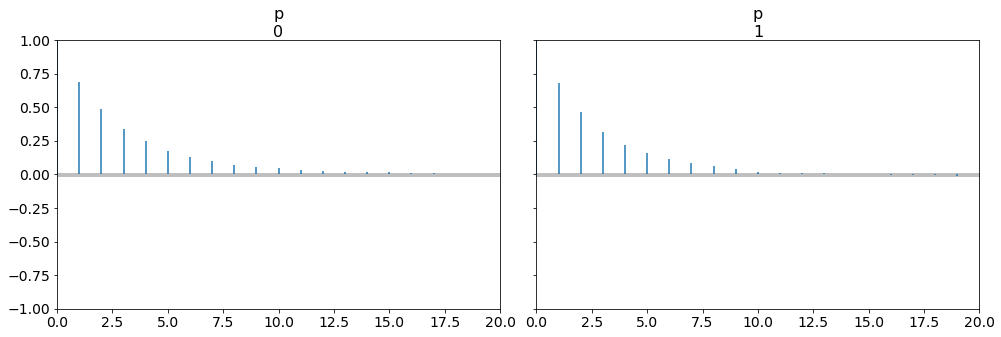

In [18]:
# Gráfico para avaliar a correlação das observações.
# É desejável que as observações sorteadas não tenham correlação expressiva.
az.plot_autocorr(trace_original, ['p'], max_lag=20 )

Observando que há expressiva correlação, vamos saltar observações e recalcular a correlação.

In [20]:
import pandas as pd

trace = trace_original.get_values('p', burn=0, chains=[0, 1], combine = False, thin = 10)
# Transpondo as duas linha que correspondem às observações de cada linha
trace_1 = np.array(trace).T.tolist()

df_describe = pd.DataFrame(trace_1)
df_describe.describe(percentiles = [0.025, 0.50, 0.975])

,0,1
count,2500.000000,2500.000000
mean,0.306432,0.306313
std,0.037476,0.037333
min,0.204047,0.184947
2.5%,0.236564,0.238158
50%,0.306289,0.304672
97.5%,0.383827,0.382219
max,0.442123,0.475400


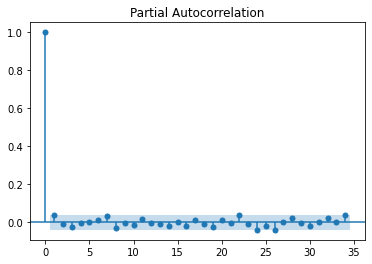

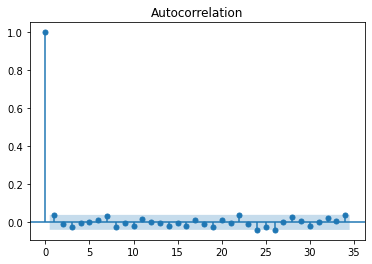

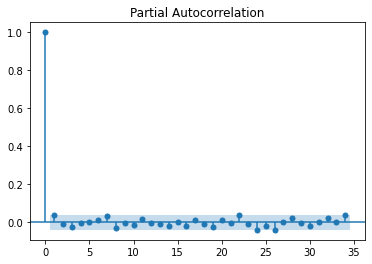

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Cadeia 1
plot_acf(df_describe.iloc[:, 0])
plot_pacf(df_describe.iloc[:, 0])

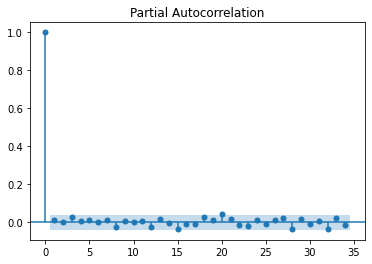

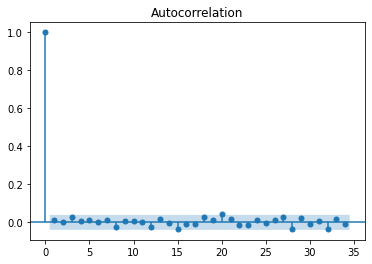

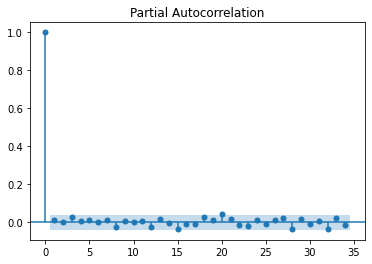

In [22]:
# Cadeia 2
plot_acf(df_describe.iloc[:, 1])
plot_pacf(df_describe.iloc[:, 1])

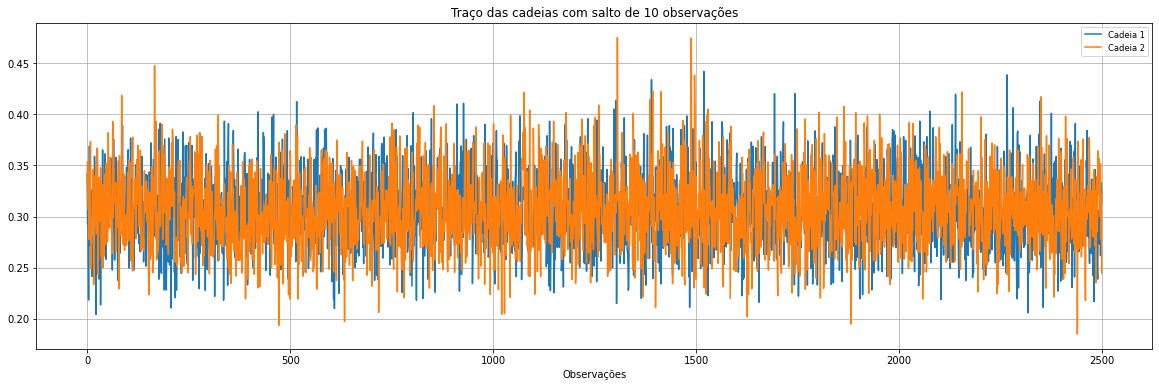

In [23]:
plt.figure(figsize = (20, 6))
plt.plot(df_describe, label = ['Cadeia 1', 'Cadeia 2'])
plt.title(r'Traço das cadeias com salto de 10 observações')
plt.xlabel(r'Observações')
plt.legend(loc='upper right', shadow=False, fontsize='small')
plt.grid()
plt.show()

Julgo satisfatória a diminuição da correlação. Vamos juntar as amostras e calcular as estatísticas de interesse. A propósito, qual é a utilidade de calcular duas cadeias ao invés de uma. Além da vantagem de usar mais de um núcleo de processador para criar a amostra, podemos avaliar, com a ajuda do gráfico de traços se já ocorreu a convergência. Para problemas mais complexos, pode ser necessário aumentar o parâmetro **tune** para retirar da amostra final um trecho inicial maior da cadeia que ainda não tenha convergido. A propósito, o gráfico de traços acima não dá mostras de algum problema de convergência.

In [26]:
trace = trace_original.get_values('p', burn=0, chains=[0, 1], combine = True, thin = 10)
trace_1 = np.array(trace).T.tolist()
df_describe = pd.DataFrame(trace_1)
df_describe.describe(percentiles = [0.025, 0.50, 0.975])

,0
count,5000.000000
mean,0.306373
std,0.037401
min,0.184947
2.5%,0.237237
50%,0.305541
97.5%,0.382633
max,0.475400


Temos como estimadores pontuais para $p$ a média igual 0,307265 ou a mediana igual a 0,306055.

Com os percentis acima, podemos criar um intervalo de credibilidade. Não se trata de um intervalo HPD, mas pode ser usado.
Para o cálculo do HPD, encontramos um código da fonte: https://github.com/PacktPublishing/Bayesian-Analysis-with-Python/blob/master/Chapter%201/hpd%20(1).py

In [27]:
from __future__ import division
import numpy as np
import scipy.stats.kde as kde

def hpd_grid(sample, alpha=0.05, roundto=2):
    """Calculate highest posterior density (HPD) of array for given alpha. 
    The HPD is the minimum width Bayesian credible interval (BCI). 
    The function works for multimodal distributions, returning more than one mode
    Parameters
    ----------
    
    sample : Numpy array or python list
        An array containing MCMC samples
    alpha : float
        Desired probability of type I error (defaults to 0.05)
    roundto: integer
        Number of digits after the decimal point for the results
    Returns
    ----------
    hpd: array with the lower 
          
    """
    sample = np.asarray(sample)
    sample = sample[~np.isnan(sample)]
    # get upper and lower bounds
    l = np.min(sample)
    u = np.max(sample)
    density = kde.gaussian_kde(sample)
    x = np.linspace(l, u, 2000)
    y = density.evaluate(x)
    #y = density.evaluate(x, l, u) waitting for PR to be accepted
    xy_zipped = zip(x, y/np.sum(y))
    xy = sorted(xy_zipped, key=lambda x: x[1], reverse=True)
    xy_cum_sum = 0
    hdv = []
    for val in xy:
        xy_cum_sum += val[1]
        hdv.append(val[0])
        if xy_cum_sum >= (1-alpha):
            break
    hdv.sort()
    diff = (u-l)/20  # differences of 5%
    hpd = []
    hpd.append(round(min(hdv), roundto))
    for i in range(1, len(hdv)):
        if hdv[i]-hdv[i-1] >= diff:
            hpd.append(round(hdv[i-1], roundto))
            hpd.append(round(hdv[i], roundto))
    hpd.append(round(max(hdv), roundto))
    ite = iter(hpd)
    hpd = list(zip(ite, ite))
    modes = []
    for value in hpd:
         x_hpd = x[(x > value[0]) & (x < value[1])]
         y_hpd = y[(x > value[0]) & (x < value[1])]
         modes.append(round(x_hpd[np.argmax(y_hpd)], roundto))
    return hpd, x, y, modes

HDI = hpd_grid(df_describe, alpha=0.05, roundto=6)
print(HDI[0])


[(0.234058, 0.382408)]


Observe que o intervalo HPD não difere tanto do obtido pelo percentil, principalmente se a distribuição a posteriori é simétrica. Podem ocorrer grandes diferenças caso a distribuição a posteriori seja assimétrica e/ou bimodal.

## Um dado curiosamente viciado

Já reparou que em classificações de estrelas de lojas de aplicativos, mesmo os aplicativos melhor avaliados costumam ter uma quantidade de notas mínimas maior do que a segunda menor nota?

Por simplicidade vamos supor que o jurado do concurso do problema anterior somente jogasse um dado para decidir a nota de cada um dos $n=10$ competidores. O dado usado tem seis faces. Em cada uma delas se vê uma das notas possíveis: 0, 1, 2, 3, 4 e 5. Ou seja, temos um problema semelhante que pode ser modelado de forma diferente.

Como conseguir uma modelagem que tenha flexibilidade para contemplar a situação em que haja muitas notas altas e muitas notas baixas? A distribução binomial é unimodal. Não seria a melhor distribuição para modelar este problema.

Seja $X_i$ frequência em que aparece a nota $i$. Cada $p_i$, por sua vez, representam a probabilidade da nota $i$ ser sorteada. Nesse problema, vamos usar uma distribuição $\mathbf{X} = (X_0, \ldots, X_5) \sim Multinomial(p_0,\ldots, p_5)$, sendo $\sum_{i=0}^5 x_i = n$,  com distribuição a priori conjugada $\mathbf{p} =(p_0,\ldots, p_5) \sim Dirichlet(\alpha_0,\ldots, \alpha_5),$ sendo $\sum_{i=0}^5 p_i = 1$. Apesar de termos $n = 10$ notas, temos apenas um vetor que registra as notas. Portanto, temos uma amostra de tamanho $N=1$ representada pelo vetor $\mathbf{x}_1$ que registra as frequências desse concurso. Veja que a distribição Multinomial generaliza a distribuição Binomial; por sua vez, a distribuição Dirichlet generaliza a distribuição Beta. Calculemos analiticamente a distribuição a posteriori:

$${\displaystyle {\begin{aligned}p(\mathbf{p} | \mathbf{x}_1)&{}= L(\mathbf{p} | \mathbf{x}_1).p(\mathbf{p})\\&{}=\prod_{i=1}^N \left(\frac{n!}{x_0!\cdots x_5!} p_0^{x_0} \cdots p_5^{x_5}\right).\frac {\Gamma {\bigl (}\sum _{i=1}^{K}\alpha _{i}{\bigr )}} {\prod _{i=1}^{K}\Gamma (\alpha _{i})} \prod _{i=1}^{K}p_{i}^{\alpha _{i}-1}\\&{}\propto \prod _{i=0}^{5}p_{i}^{x_i + \alpha _{i}-1} \sim Dirichlet(x_0 + \alpha_0,\ldots, x_5 + \alpha_5).\end{aligned}}}$$

Como decidir os valores dos hiperparâmetros alfa? Nesse caso, preferimos uma priori que atribua o pesmo peso a todas as notas: $\alpha_i = 1$ com $i=0,\ldots, 5$. Veja que temos um total de 6 notas possíveis. Cada parâmetro $p_i$ consegue fazer um controle mais fino da probabilidade de sair cada valor da face de um dado. Outra suposição que fazemos é que existe independência no sorteio dos valores.

0    2
1    1
2    2
4    4
5    1
dtype: int64
[2 1 2 0 4 1]


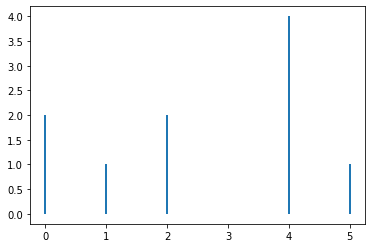

In [28]:
notas = pd.DataFrame([2,4,5,4,0,0,4,1,2,4])
freq = notas.value_counts(normalize=False, sort=True, ascending=True, dropna=True).sort_index()
print(freq)

# Gráfico
values, counts = np.unique(notas, return_counts=True)
plt.vlines(values, 0, counts, lw=2)
# Inserimos manualmente a frequência (zero) do valor 3
contagem = np.concatenate((np.array(counts[:3]),np.array([0]),np.array(counts[3:])), axis=0)
print(contagem)

In [29]:
theta = np.repeat(1/6, 6, axis=0)
n = 10
k = 6
with pm.Model() as model:
    # Distribuições a priori
    p = pm.Dirichlet('p', a = theta)
    
    # Verossimilhança
    obs = pm.Multinomial('contagem', n=n, p=p, shape=(n, k), observed=contagem)
    
    # Algoritmo usado
    step = pm.Metropolis()

    # Sorteios de observações da distribuição a posteriori
    trace_original = pm.sample(draws= 60000, tune = 3000, chains= 1, step = step, cores = 2)
    # Para facilitar a análise, preferi gerar apenas uma cadeia grande

/tmp/ipykernel_873524/1735280456.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_original = pm.sample(draws= 60000, tune = 3000, chains= 1, step = step, cores = 2)
Sequential sampling (1 chains in 1 job)
Metropolis: [p]


Sampling 1 chain for 3_000 tune and 60_000 draw iterations (3_000 + 60_000 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


/home/moura/myprojectdir/myprojectenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p\n0'}>,
        <AxesSubplot:title={'center':'p\n0'}>],
       [<AxesSubplot:title={'center':'p\n1'}>,
        <AxesSubplot:title={'center':'p\n1'}>],
       [<AxesSubplot:title={'center':'p\n2'}>,
        <AxesSubplot:title={'center':'p\n2'}>],
       [<AxesSubplot:title={'center':'p\n3'}>,
        <AxesSubplot:title={'center':'p\n3'}>],
       [<AxesSubplot:title={'center':'p\n4'}>,
        <AxesSubplot:title={'center':'p\n4'}>],
       [<AxesSubplot:title={'center':'p\n5'}>,
        <AxesSubplot:title={'center':'p\n5'}>]], dtype=object)

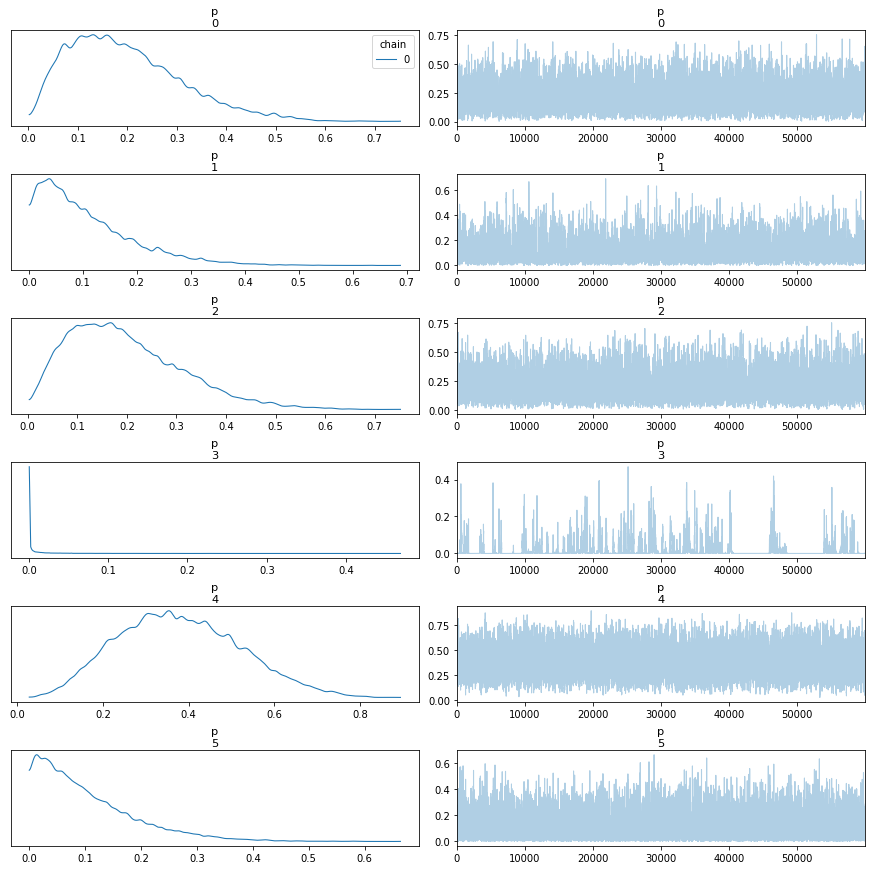

In [30]:
# Gráfico para avaliar a convergência do método
az.plot_trace(trace_original, ['p'], compact=False, legend=True)

/home/moura/myprojectdir/myprojectenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p\n0, 0'}>,
        <AxesSubplot:title={'center':'p\n0, 1'}>,
        <AxesSubplot:title={'center':'p\n0, 2'}>],
       [<AxesSubplot:title={'center':'p\n0, 3'}>,
        <AxesSubplot:title={'center':'p\n0, 4'}>,
        <AxesSubplot:title={'center':'p\n0, 5'}>]], dtype=object)

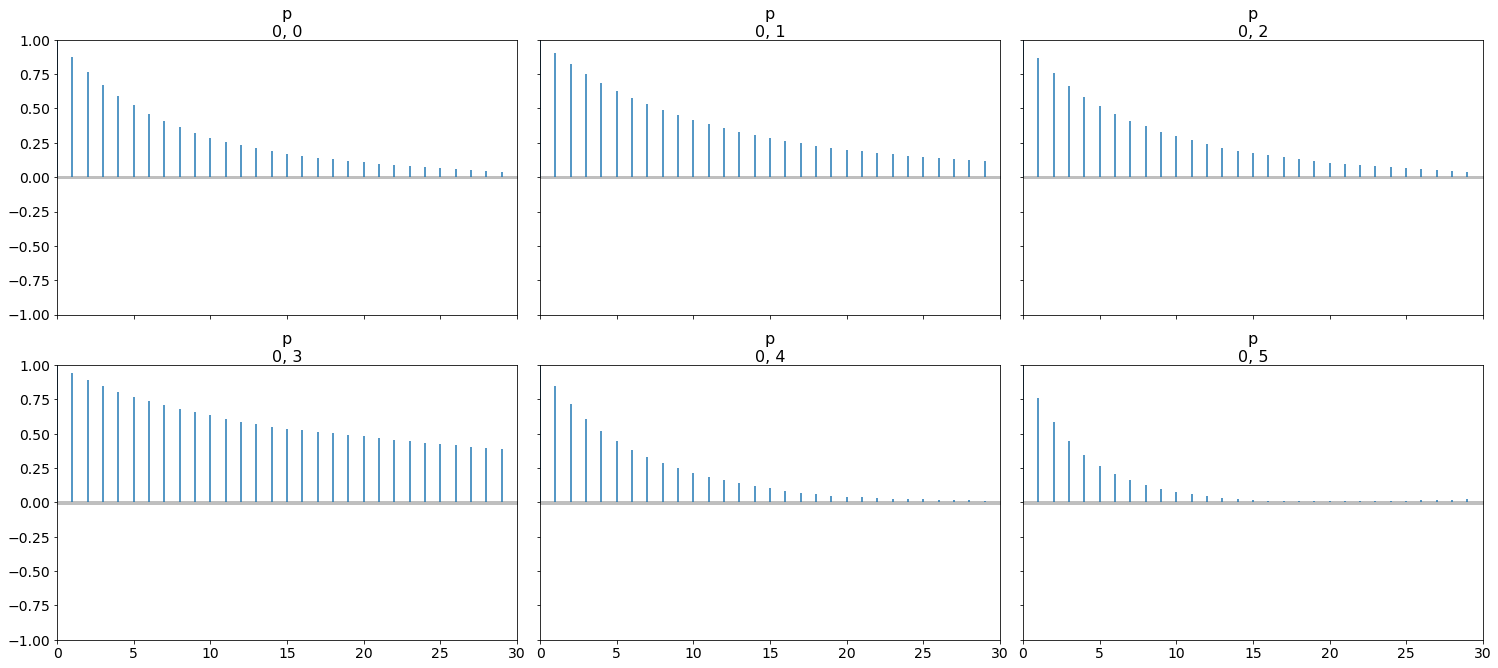

In [31]:
# Gráfico para avaliar a correlação das observações.
# É desejável que as observações sorteadas não tenham correlação expressiva.
az.plot_autocorr(trace_original, ['p'], max_lag=30 )

In [32]:
az.summary(trace_original, var_names = ['p'], round_to=6, hdi_prob=0.95)

/home/moura/myprojectdir/myprojectenv/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 60000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p[0],0.197129,0.114477,0.016786,0.425520,0.001911,0.001351,3212.627160,4037.685241,NaN
p[1],0.108694,0.088729,0.000208,0.284682,0.001816,0.001284,1781.002398,2167.624784,NaN
p[2],0.196805,0.113983,0.007261,0.411125,0.001905,0.001347,3183.591607,3637.546431,NaN
p[3],0.012676,0.032787,0.000000,0.072998,0.001550,0.001097,32.745502,45.091677,NaN
p[4],0.379027,0.141263,0.117235,0.651468,0.002060,0.001457,4615.818525,6122.607387,NaN
p[5],0.105669,0.088678,0.000034,0.282298,0.001019,0.000720,5941.600895,6395.104195,NaN


In [33]:
import pandas as pd

trace = trace_original.get_values('p', burn=0, combine = False, thin = 30)
# Transpondo as duas linha que correspondem às observações de cada linha
#trace_1 = np.array(trace).T.tolist()
#print(trace_1)
df_describe = pd.DataFrame(trace)


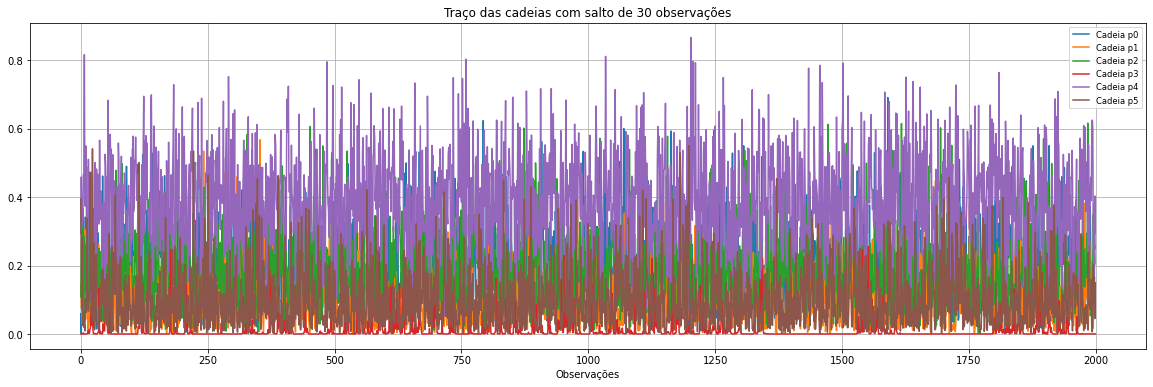

In [34]:
# Cadeia 1 dos 6 parâmetros
plt.figure(figsize = (20, 6))


plt.plot(df_describe, label = ['Cadeia p0','Cadeia p1','Cadeia p2','Cadeia p3','Cadeia p4','Cadeia p5'])
plt.title(r'Traço das cadeias com salto de 30 observações')
plt.xlabel(r'Observações')
plt.legend(loc='upper right', shadow=False, fontsize='small')
plt.grid()
plt.show()


#plot_acf(df_describe)
#plot_pacf(df_describe)

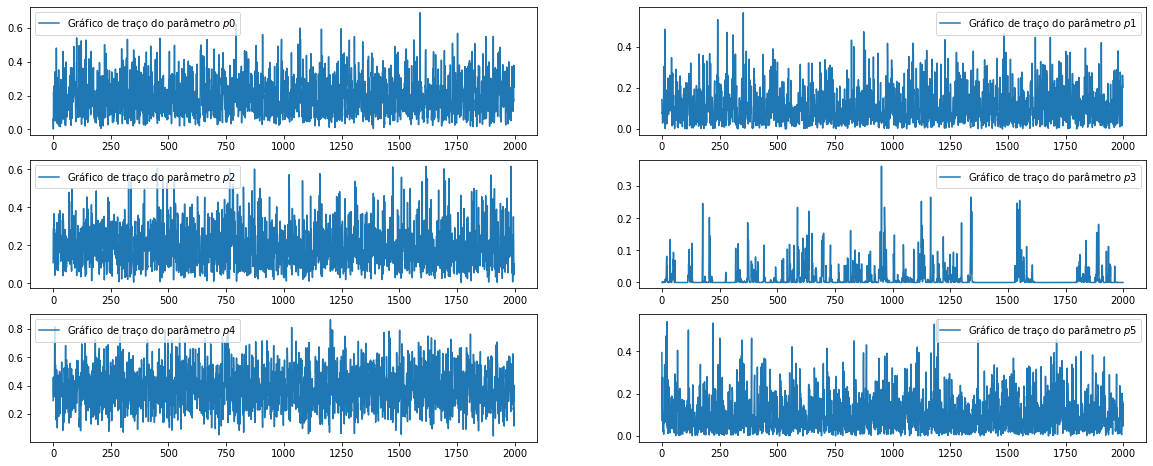

In [35]:
# Plotando o traceplot de cada parâmetro separadamente
import math as m
i,j, k =0, 0, 0
plots_por_linha = 2
fig, axs = plt.subplots(m.ceil(len(df_describe.columns)/plots_por_linha), plots_por_linha, figsize=(20, 8))
for col in df_describe.columns:
    axs[i][j].plot(df_describe[col], label= r'Gráfico de traço do parâmetro $p$' + str(i+j+k))
    axs[i][j].legend()
    j+=1
    
    if j%plots_por_linha==0:
        i+=1
        j=0
        k+=1
plt.show()

Veja  que conseguimos estimativas dos parâmetros $p_i$ com $i=0,\ldots, 5$.

In [36]:
df_describe.describe(percentiles = [0.025, 0.50, 0.975])

,0,1,2,3,4,5
count,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,0.196085,0.108254,0.196373,1.291961e-02,0.383064,0.103304
std,0.112926,0.087450,0.112364,3.276739e-02,0.143868,0.089054
min,0.001262,0.000275,0.004155,6.177549e-24,0.043016,0.000153
2.5%,0.032242,0.005277,0.032224,1.199029e-14,0.134040,0.005499
50%,0.180893,0.086079,0.179801,3.469582e-04,0.374210,0.078119
97.5%,0.459435,0.335918,0.459756,1.113858e-01,0.676692,0.337767
max,0.691113,0.567751,0.616437,3.619663e-01,0.866727,0.550266


Uma pergunta interessante: a soma das estimativa é igual a 1? Queremos que a soma seja igual a 1, por constituir a condição do parâmetro $p$ da distribuição multinomial. Vejamos

In [37]:
medias = df_describe.describe(percentiles = [0.025, 0.50, 0.975]).iloc[1,:]
print(medias)
soma = medias.sum()
print(soma)

0    0.196085
1    0.108254
2    0.196373
3    0.012920
4    0.383064
5    0.103304
Name: mean, dtype: float64
1.0000000000000004


O valor da soma ficou bastante próximo de 1. E no caso da mediana?

In [38]:
medianas = df_describe.describe(percentiles = [0.025, 0.50, 0.975]).iloc[5,:]
print(medianas)
soma_md = medianas.sum()
print(soma_md)

0    0.180893
1    0.086079
2    0.179801
3    0.000347
4    0.374210
5    0.078119
Name: 50%, dtype: float64
0.8994481306803538


Nesse caso, a soma ficou abaixo de 1. Logo, uma possibilidade de uso dessas estimativas via mediana, seria padronizar as estimativas dividindo-as pela soma das medianas:

In [39]:
medianas_p = medianas/soma_md
print(medianas_p)

0    0.201115
1    0.095702
2    0.199902
3    0.000386
4    0.416044
5    0.086852
Name: 50%, dtype: float64


Um comentário final: esta inferência é quase igual a calcular a proporção de uma determinada nota na amostra. Entretanto, calcula-se também o intervalo de credibilidade e seria possível adotar uma distribuição a priori mais informativa. Poderíamos agregar as notas que esse jurado deu em competiçoes anteriores de forma a fornecer mais precisão às estimativas feitas (a amostra deixaria de ter tamanho 1, pois aqui só usamos um vetor com todas as notas).